## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("Print shape of our Dataset is",df.shape)

Print shape of our Dataset is (614, 13)


### About Dataset:
- Features :

    - Loan_ID : unique ID in loan application
    - Gender : Male , Female
    - Married : Yes, No
    - Dependents : Number of breadearners in a family, 0,1,2,3+
    - Education : Highest Qualification
    - Self_Employed : Owns a business or not.
    - ApplicantIncome : Income of Loan Applicant
    - CoapplicantIncome : Income of partner in joint loan
    - Loan_Amount : Amount needed for the Loan
    - Loan_Amount_Term : Time period in which loan needs to be paid off
    - Credit History : History of loan taking and paying off
    - Property_Area : Area of Property owned by the applicant

- Target Varriable:
    - Loan_Status : Y = Yes(Approved), N = No(Not approved)

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
# Analysing Dtypes of columns and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Checking for duplicates
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
missing_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

Gender 0.0212 % missing values
Married 0.0049 % missing values
Dependents 0.0244 % missing values
Self_Employed 0.0521 % missing values
LoanAmount 0.0358 % missing values
Loan_Amount_Term 0.0228 % missing values
Credit_History 0.0814 % missing values


In [11]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

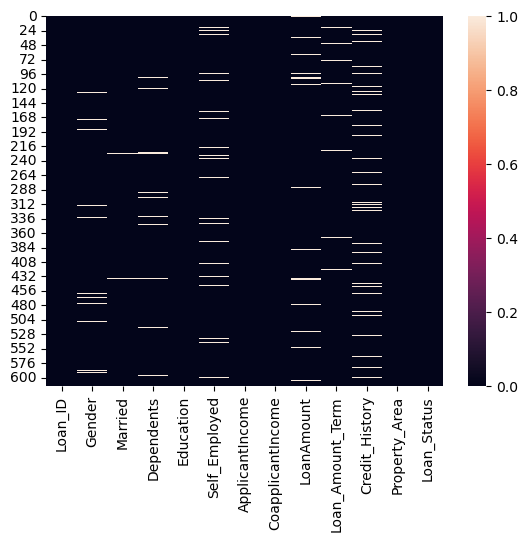

In [12]:
sns.heatmap(df.isnull())

In [13]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Number Of Numeric Features=',len(numeric_features))
numeric_features

Number Of Numeric Features= 5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Number Of Categorical Features=',len(categorical_features))
categorical_features

Number Of Categorical Features= 8


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

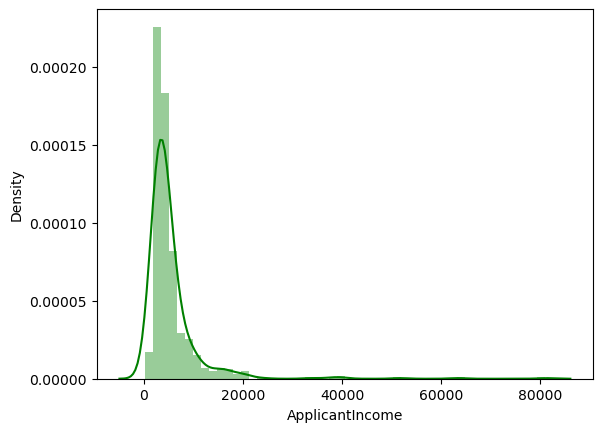

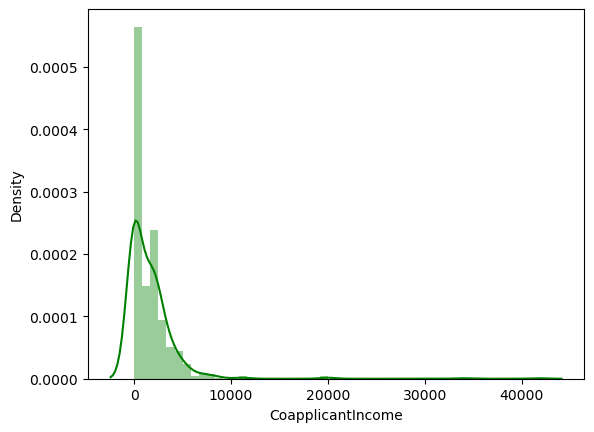

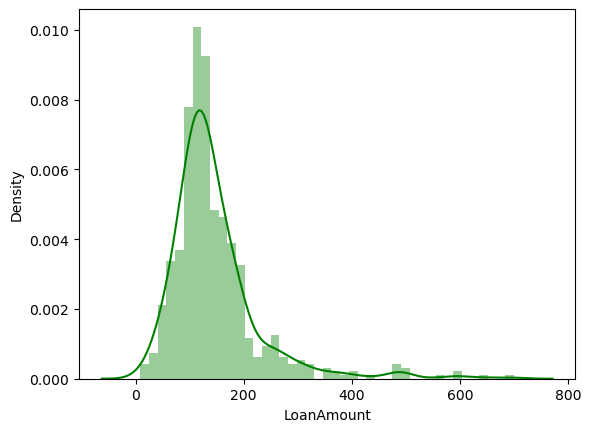

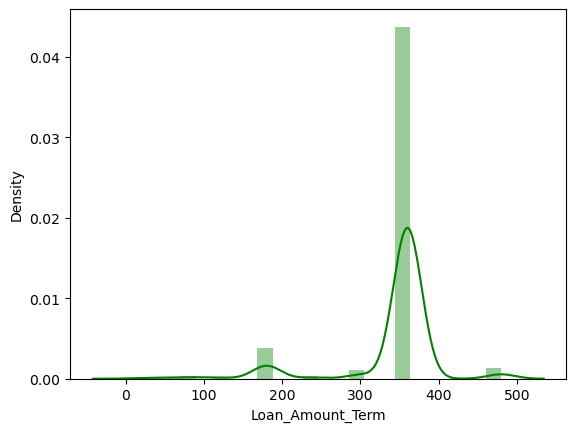

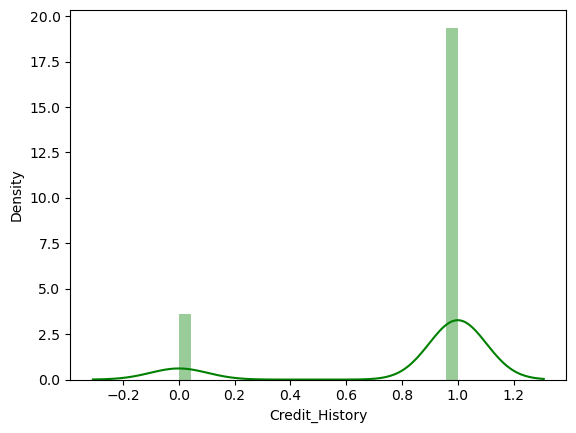

In [16]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='green')

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
data = df['Loan_Status'].value_counts()

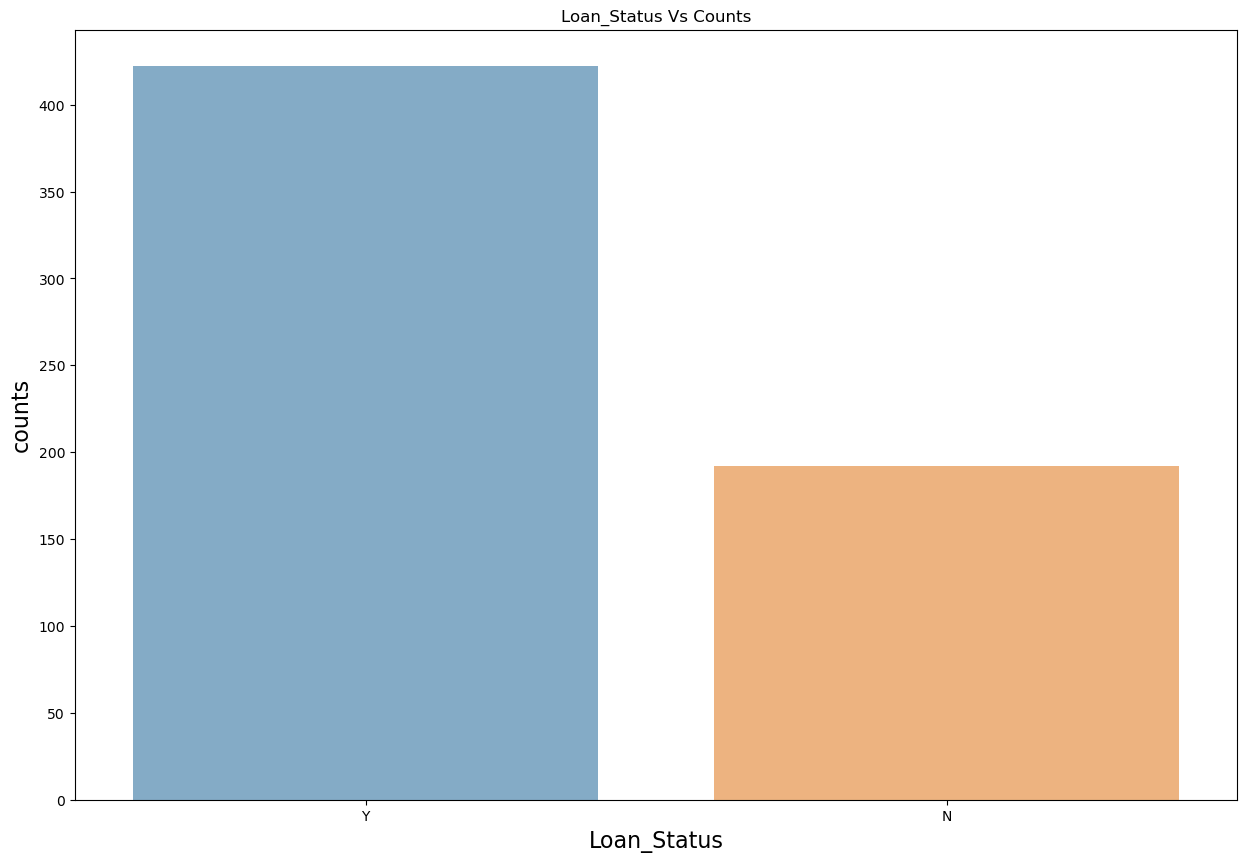

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x=data.index, y=data.values, alpha=0.6)
plt.xlabel('Loan_Status', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.title('Loan_Status Vs Counts')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

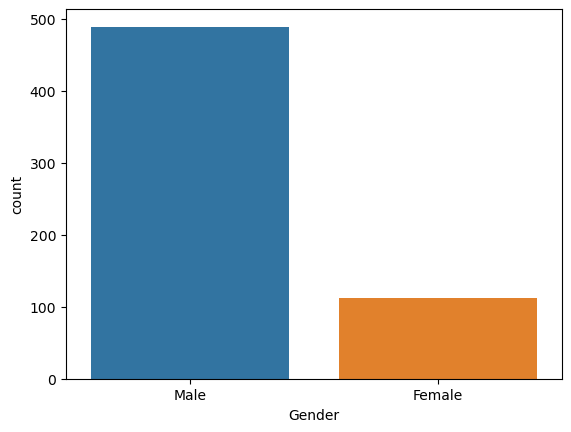

In [24]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

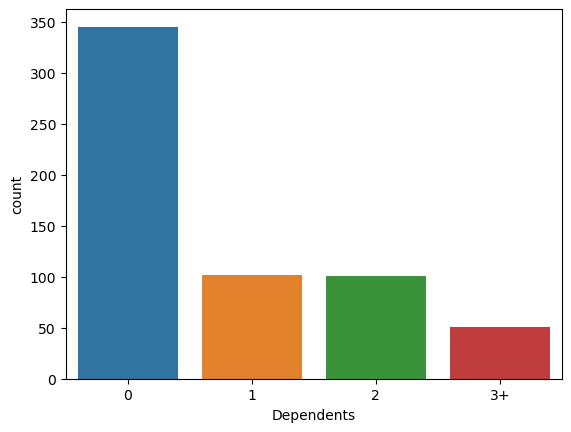

In [25]:
sns.countplot(x='Dependents', data=df)

<Axes: xlabel='Education', ylabel='count'>

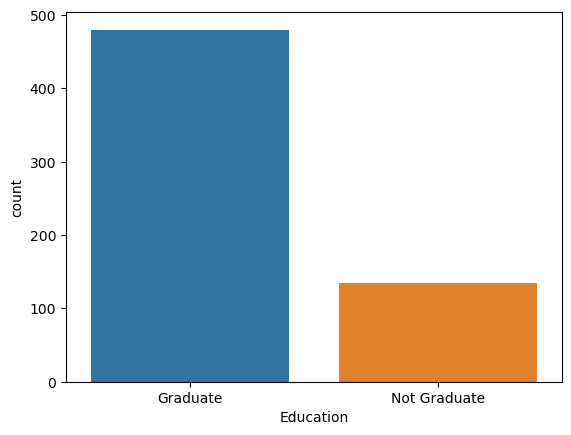

In [26]:
sns.countplot(x='Education', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

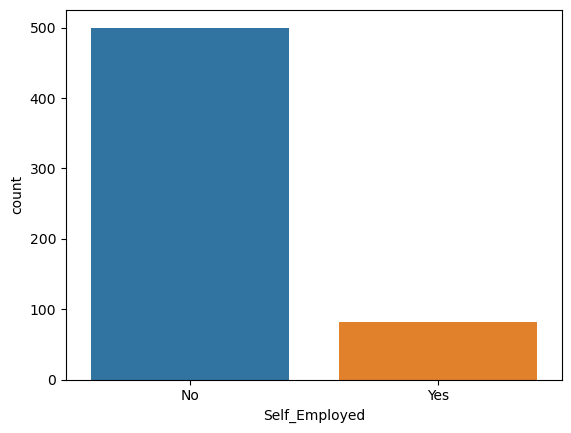

In [27]:
sns.countplot(x='Self_Employed', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

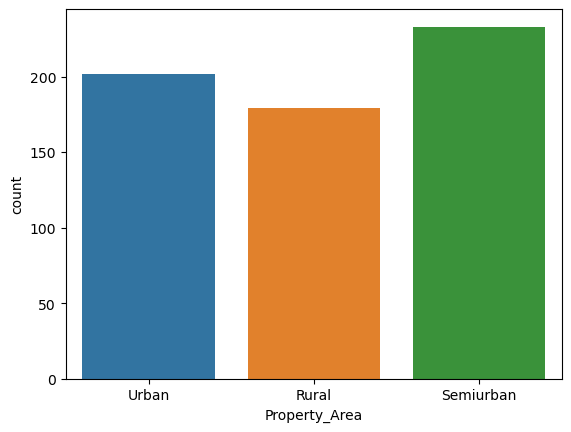

In [28]:
sns.countplot(x='Property_Area', data=df)

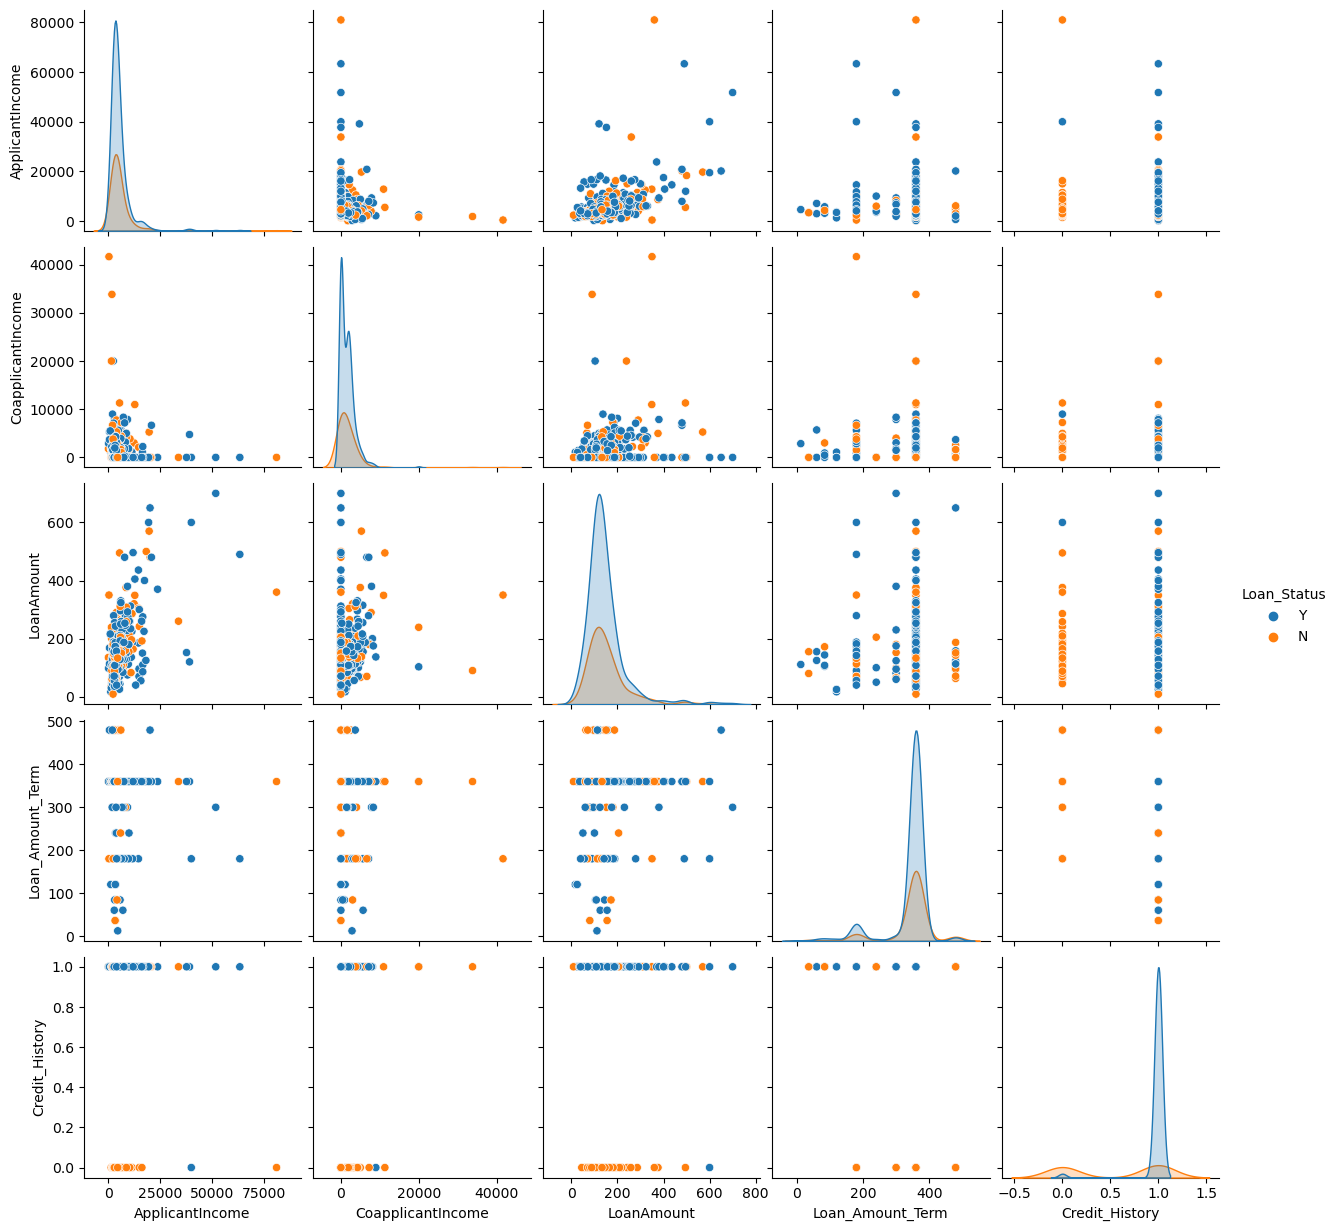

In [29]:
sns.pairplot(df, hue = 'Loan_Status')

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [32]:
df = df.drop(columns=['Loan_ID']) #removing unnecessary columns
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
#Rechecking for null values after treating them
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

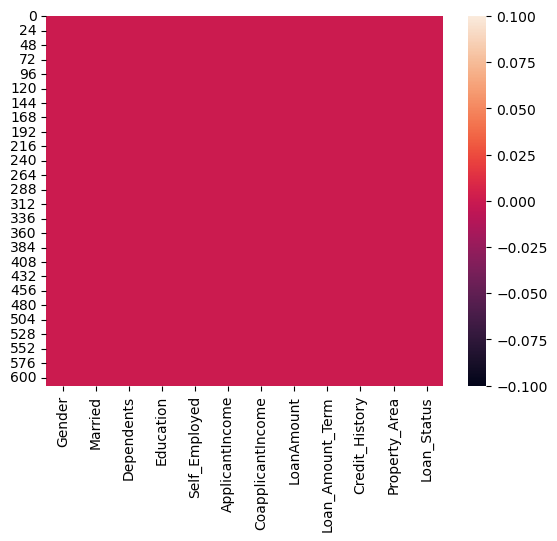

In [34]:
sns.heatmap(df.isnull())

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
list=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [37]:
lb=LabelEncoder()
for i in list:
    df[i]=lb.fit_transform(df[i])

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [39]:
#statistical summary
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


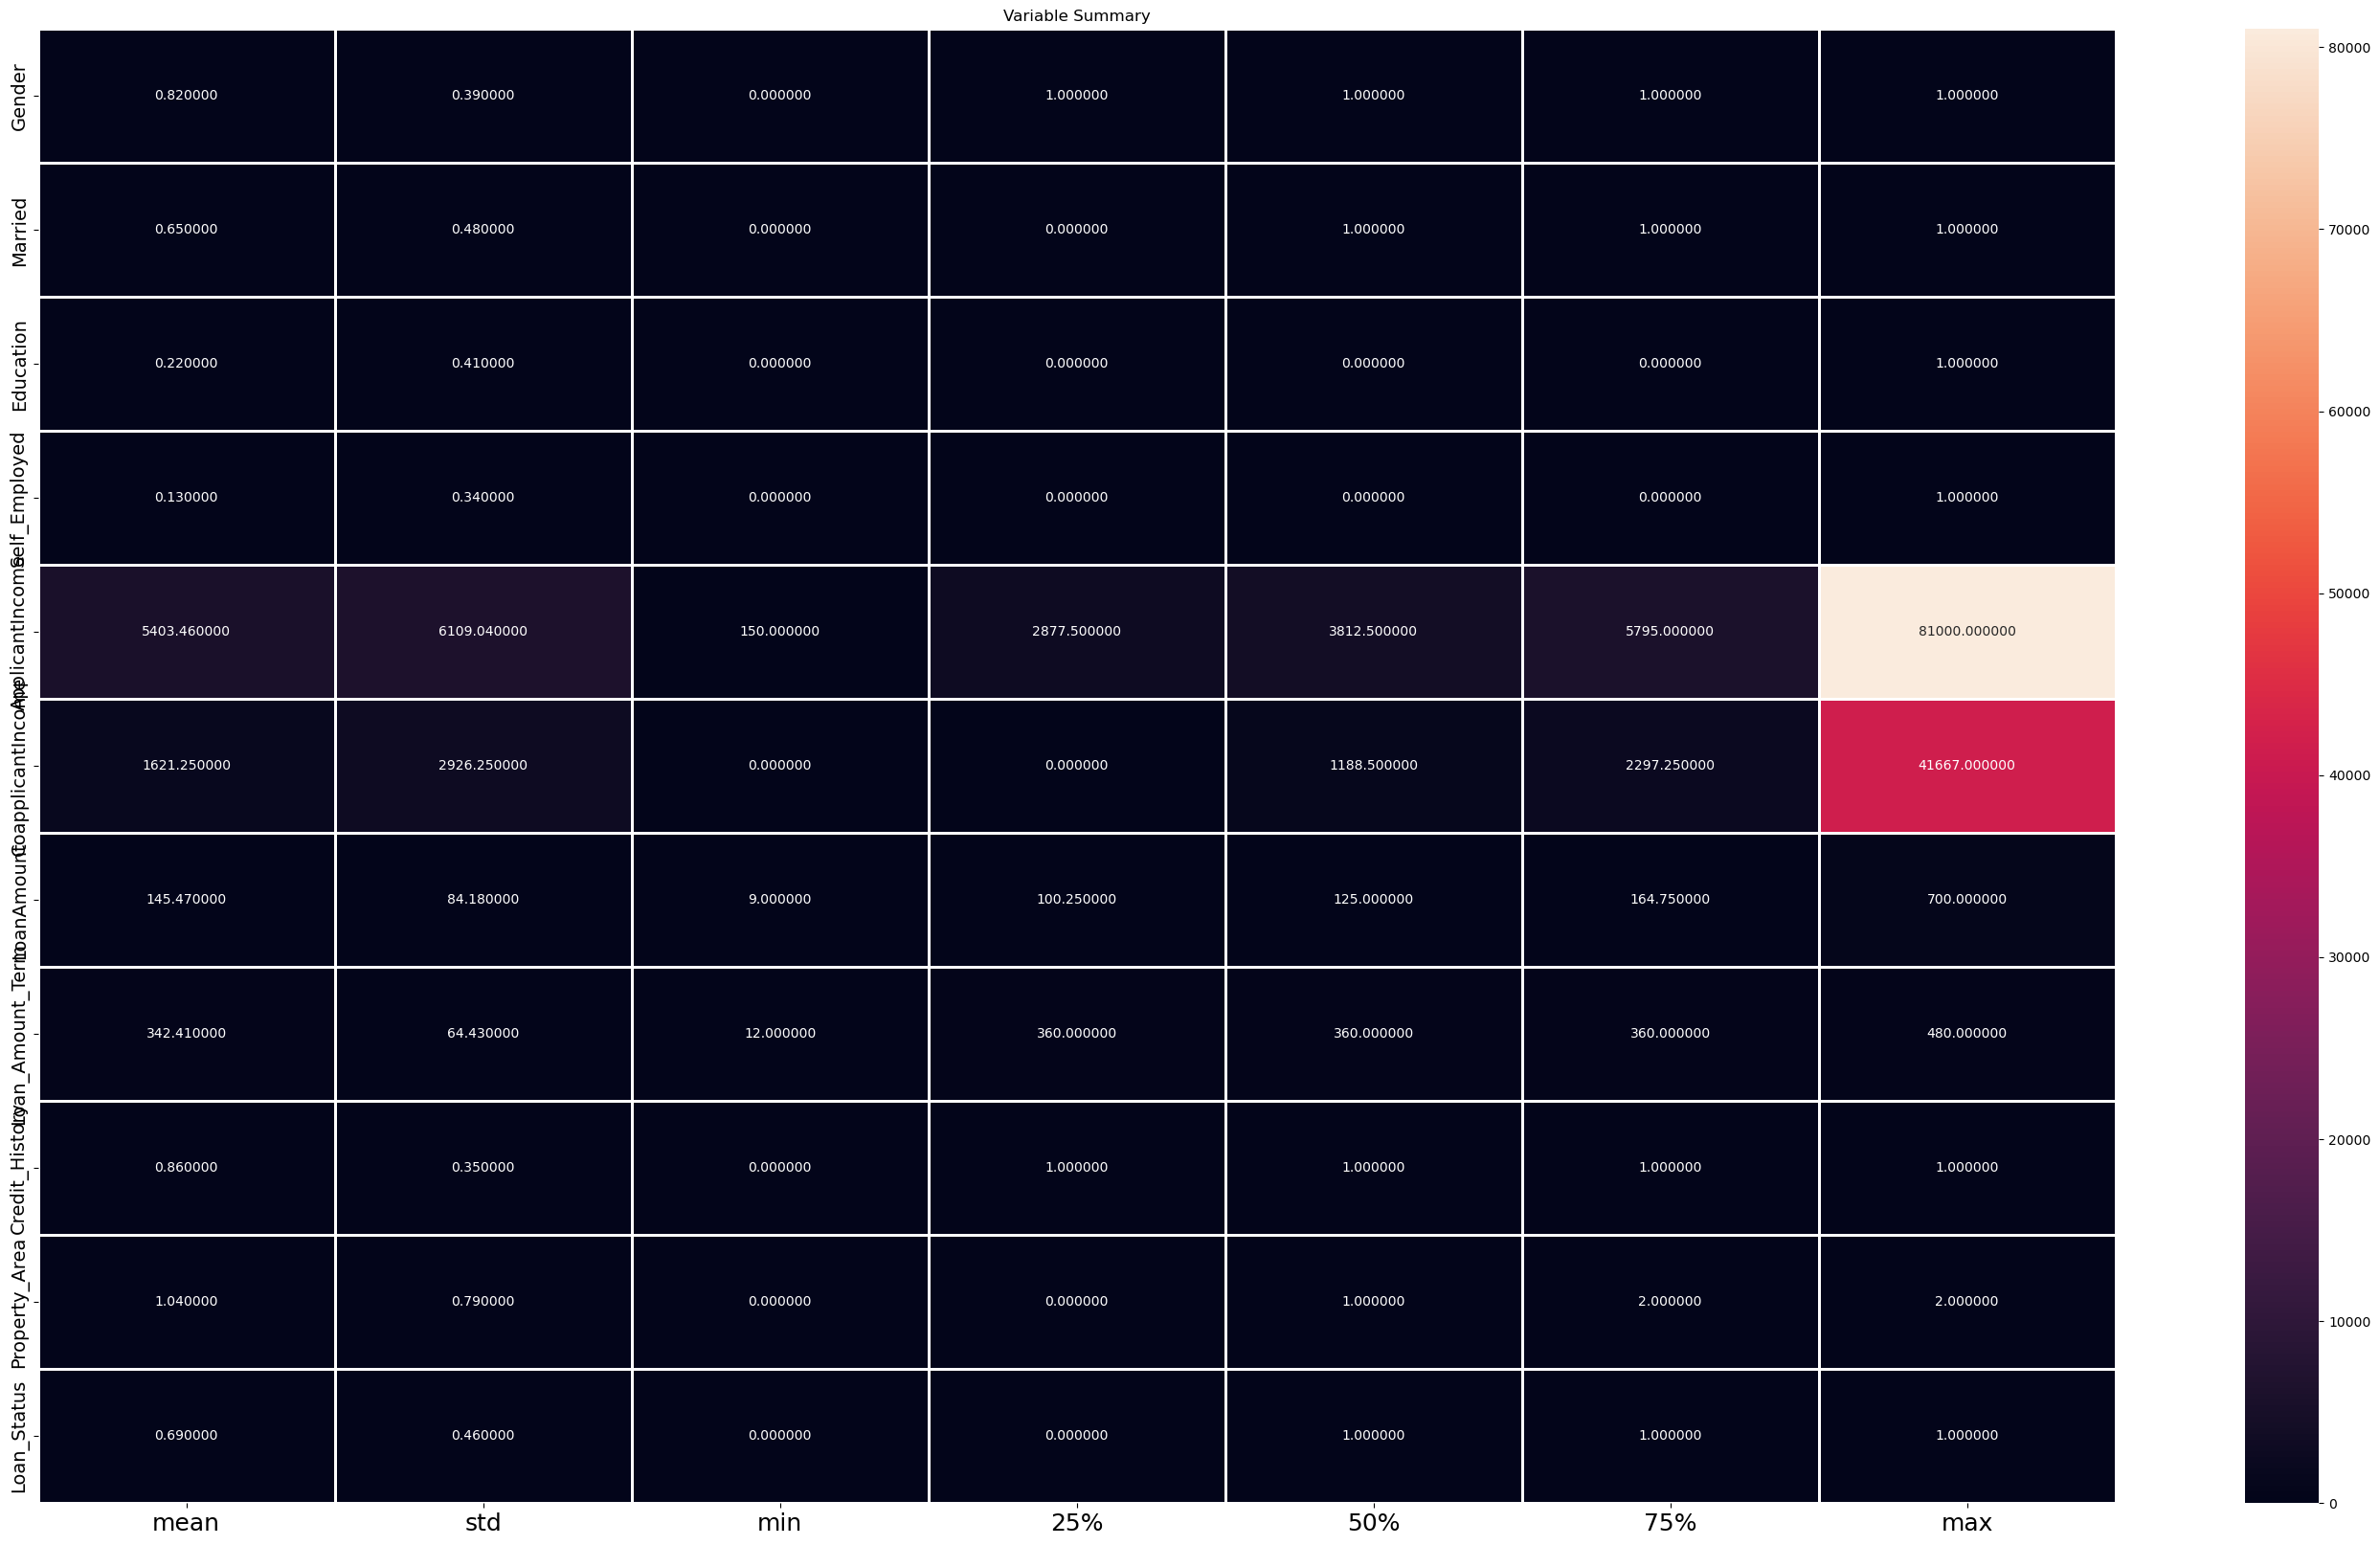

In [40]:
#visualizing dataset
plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

In [41]:
corr=df.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112


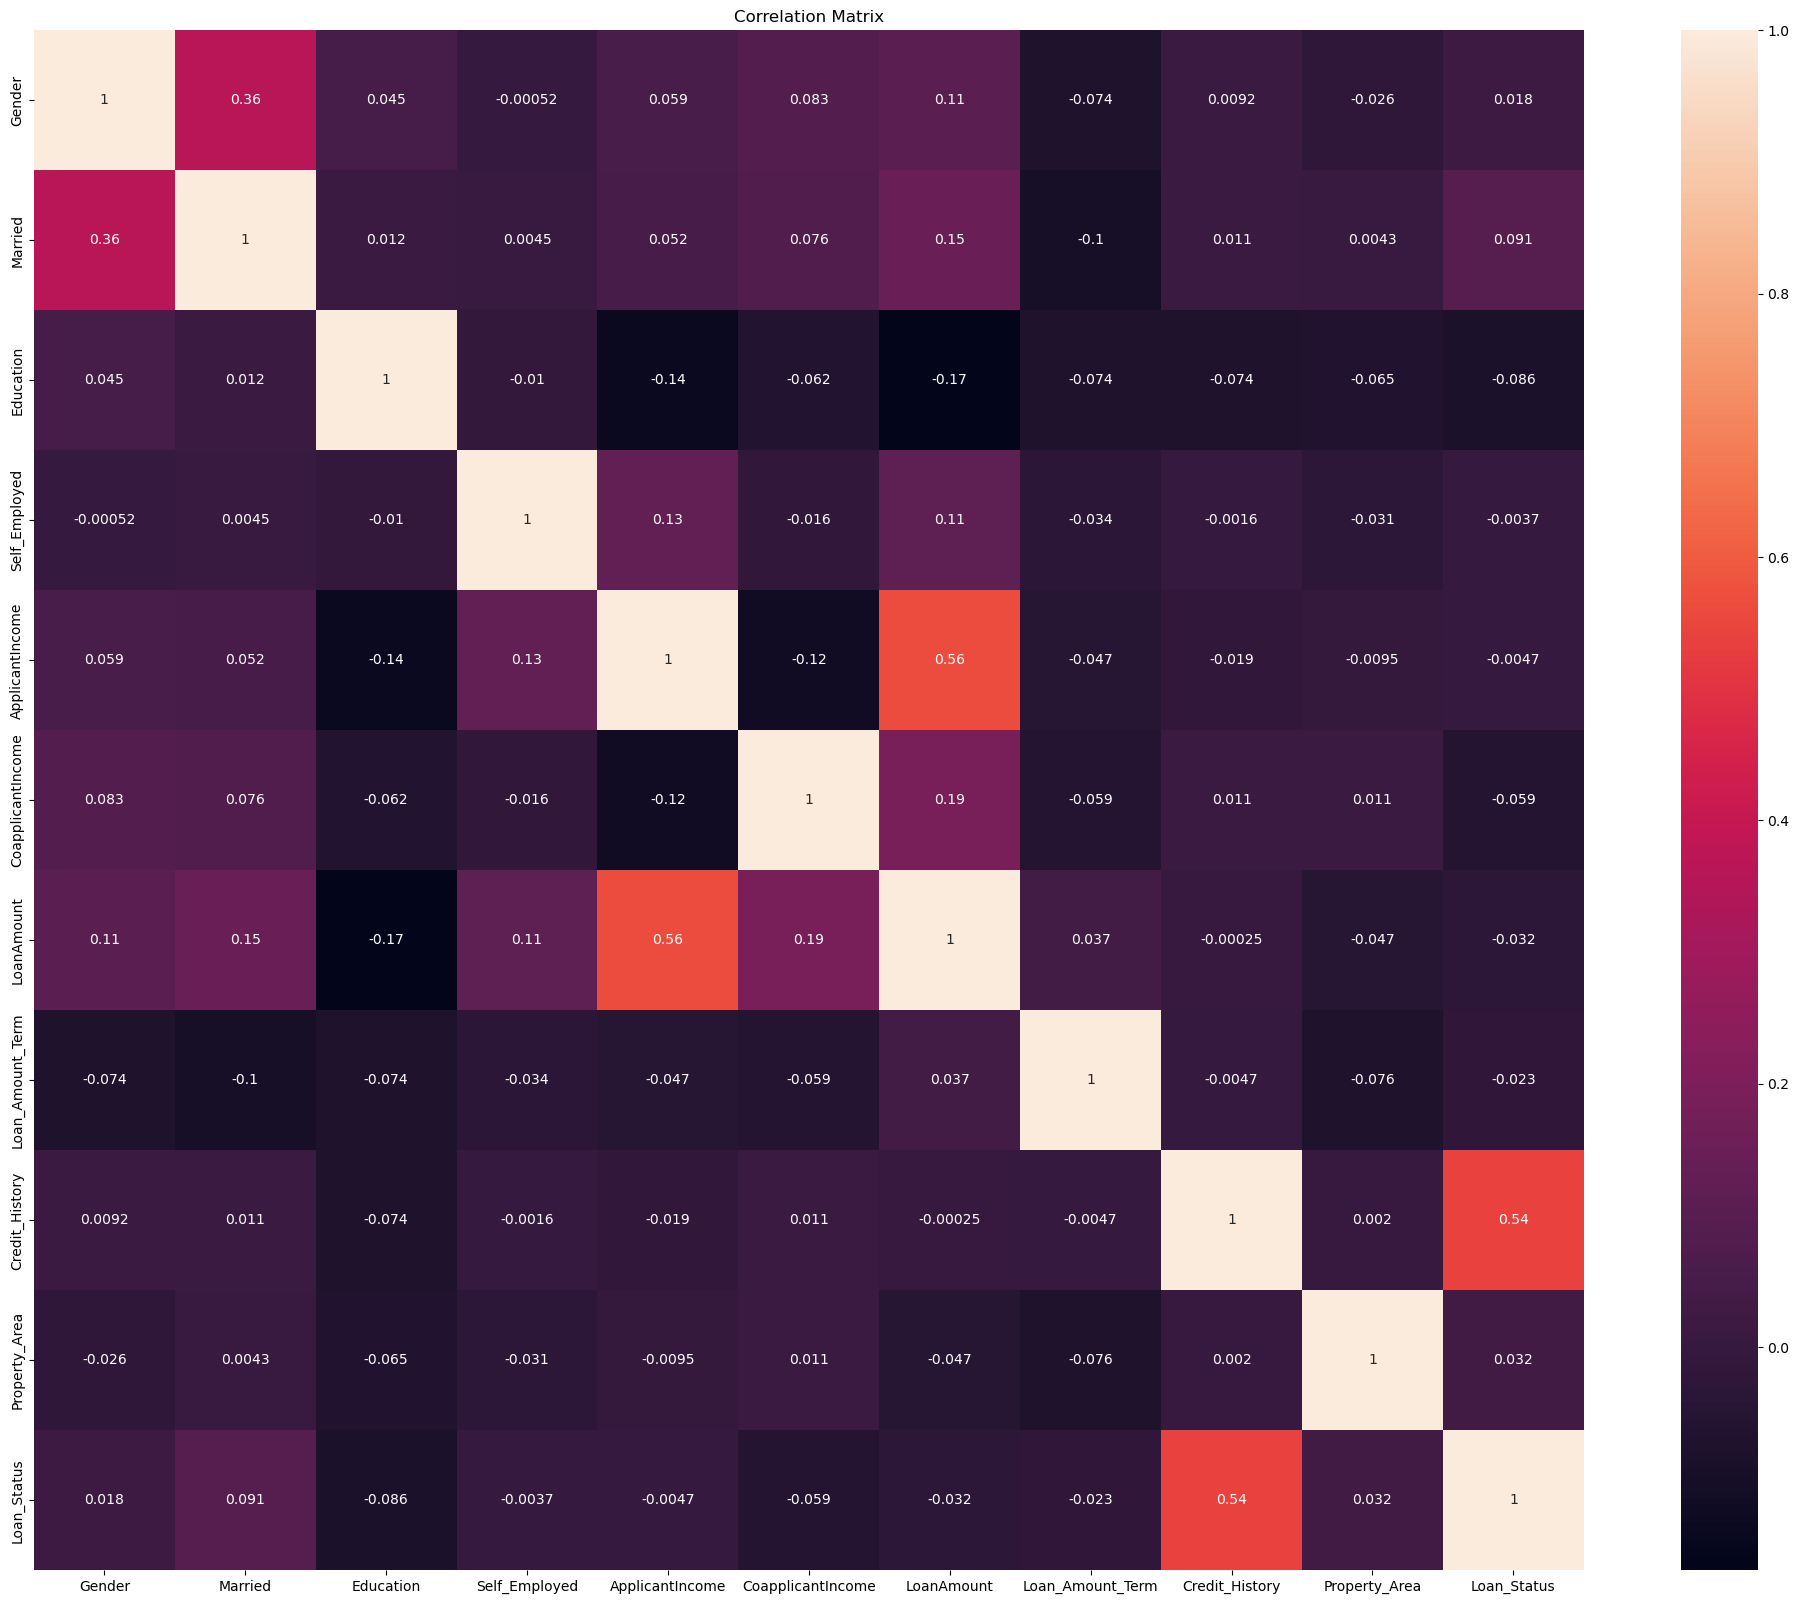

In [42]:
#Visualising correlation table
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

Gender                  Axes(0.125,0.798085;0.110714x0.0819149)
Married              Axes(0.257857,0.798085;0.110714x0.0819149)
Education            Axes(0.390714,0.798085;0.110714x0.0819149)
Self_Employed        Axes(0.523571,0.798085;0.110714x0.0819149)
ApplicantIncome      Axes(0.656429,0.798085;0.110714x0.0819149)
CoapplicantIncome    Axes(0.789286,0.798085;0.110714x0.0819149)
LoanAmount              Axes(0.125,0.699787;0.110714x0.0819149)
Loan_Amount_Term     Axes(0.257857,0.699787;0.110714x0.0819149)
Credit_History       Axes(0.390714,0.699787;0.110714x0.0819149)
Property_Area        Axes(0.523571,0.699787;0.110714x0.0819149)
Loan_Status          Axes(0.656429,0.699787;0.110714x0.0819149)
dtype: object

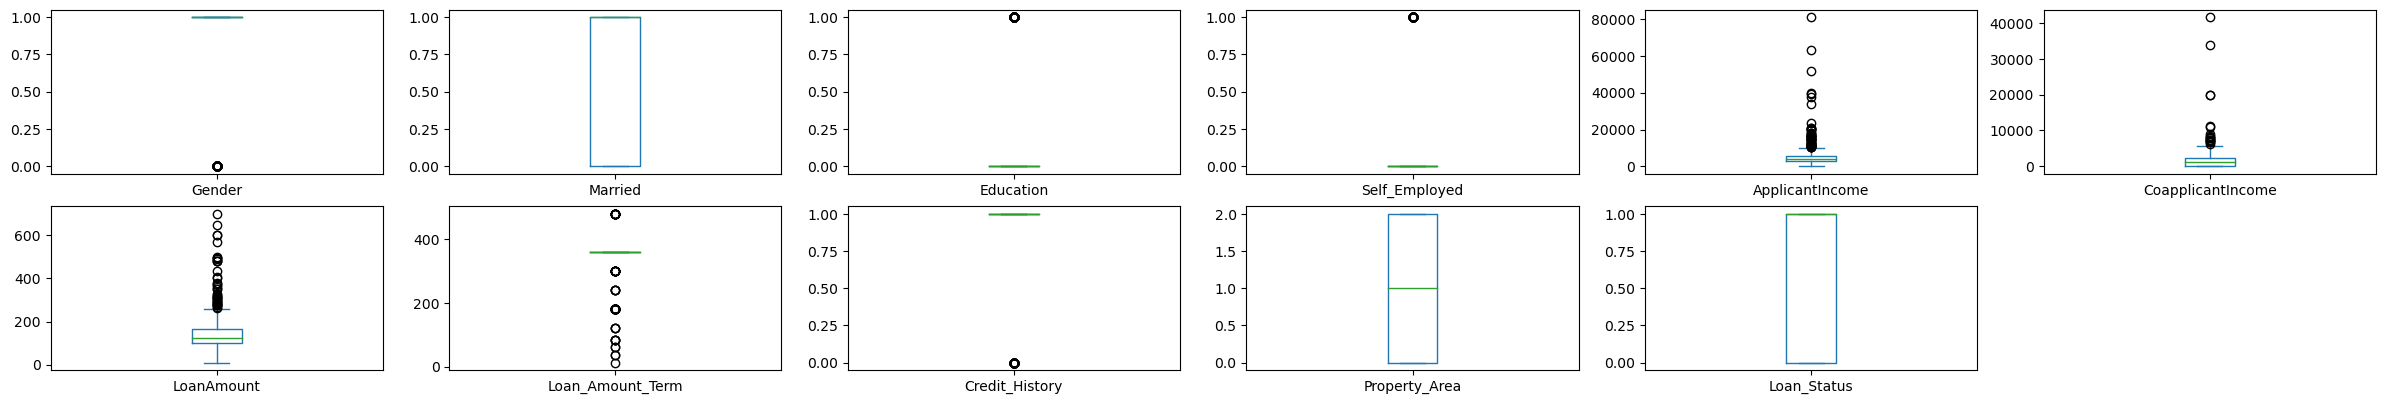

In [43]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

In [44]:
#Analysing Skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [46]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [49]:
#applying zscore on only the dataset which has numeric columns
from scipy.stats import zscore

z = np.abs(zscore(dfNumCols))
df_new = df[(z < 3).all(axis=1)]

In [50]:
df_new.shape

(577, 12)

In [51]:
loss_of_data=(614-577)/614*100
loss_of_data

6.026058631921824

In [52]:
df=df_new

In [53]:
df.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [54]:
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [56]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_new= df[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
df_new.shape

(214, 12)

##### Creation of train and test data sets using optimum parameters

In [58]:
#splitting dataset into x and y
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]
y = df['Loan_Status']
x = dfNumCols.drop(columns=['Loan_Status'])

In [59]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [60]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
std=StandardScaler()
X=std.fit_transform(x)
X

array([[ 0.39926641, -0.86103617, -0.26770712,  0.23085296,  0.41851254],
       [-0.02802029,  0.05284031, -0.12532481,  0.23085296,  0.41851254],
       [-0.56229742, -0.86103617, -1.22878771,  0.23085296,  0.41851254],
       ...,
       [ 1.14954946, -0.71559164,  2.09939878,  0.23085296,  0.41851254],
       [ 0.98450744, -0.86103617,  0.92474472,  0.23085296,  0.41851254],
       [-0.02802029, -0.86103617, -0.03633587,  0.23085296, -2.38941464]])

In [63]:
x=X

In [64]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)
y_train

385    1
421    0
405    1
490    1
493    1
474    1
86     1
311    1
192    0
338    0
128    0
78     0
446    1
75     0
13     0
293    0
104    1
156    1
55     1
566    1
110    1
65     0
182    1
380    1
312    1
34     0
188    1
515    1
472    1
217    1
539    1
398    1
349    1
218    0
234    1
248    1
565    1
258    0
584    0
77     0
158    1
563    1
528    1
357    0
53     0
607    1
553    0
112    0
453    1
377    1
244    1
483    1
154    1
173    1
125    1
300    0
463    1
276    1
143    1
586    1
79     1
521    1
372    1
132    1
170    1
238    1
488    1
410    0
444    1
478    1
180    0
178    1
303    1
45     1
518    0
56     1
572    1
404    0
352    1
587    1
588    1
26     1
179    0
225    0
471    0
336    1
390    1
325    0
159    1
54     0
330    1
431    0
393    1
140    0
309    1
395    1
346    0
127    1
166    0
425    1
601    1
611    1
559    1
428    1
202    0
375    1
576    0
593    1
66     0
386    1
597    0
2

In [65]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [66]:
lg=LogisticRegression()
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)

In [68]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [69]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()
rfc=RandomForestClassifier()

In [70]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [71]:
fun(svc)

Accuracy Score 0.8
Confusion Matrix
 [[19 26]
 [ 3 97]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.42      0.57        45
           1       0.79      0.97      0.87       100

    accuracy                           0.80       145
   macro avg       0.83      0.70      0.72       145
weighted avg       0.81      0.80      0.78       145

F1 score 0.8000000000000002


In [72]:
fun(lg)

Accuracy Score 0.8068965517241379
Confusion Matrix
 [[19 26]
 [ 2 98]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.42      0.58        45
           1       0.79      0.98      0.87       100

    accuracy                           0.81       145
   macro avg       0.85      0.70      0.73       145
weighted avg       0.83      0.81      0.78       145

F1 score 0.8068965517241379


In [73]:
fun(dtc)

Accuracy Score 0.7793103448275862
Confusion Matrix
 [[25 20]
 [12 88]]
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.56      0.61        45
           1       0.81      0.88      0.85       100

    accuracy                           0.78       145
   macro avg       0.75      0.72      0.73       145
weighted avg       0.77      0.78      0.77       145

F1 score 0.7793103448275862


In [74]:
fun(knn)

Accuracy Score 0.7724137931034483
Confusion Matrix
 [[19 26]
 [ 7 93]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.42      0.54        45
           1       0.78      0.93      0.85       100

    accuracy                           0.77       145
   macro avg       0.76      0.68      0.69       145
weighted avg       0.77      0.77      0.75       145

F1 score 0.7724137931034483


In [75]:
fun(rfc)

Accuracy Score 0.8
Confusion Matrix
 [[20 25]
 [ 4 96]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        45
           1       0.79      0.96      0.87       100

    accuracy                           0.80       145
   macro avg       0.81      0.70      0.72       145
weighted avg       0.81      0.80      0.78       145

F1 score 0.8000000000000002


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
scr = cross_val_score(lg,x,y,cv=3)
print('Cross validation score for Logistic Regression :',scr.mean())

Cross validation score for Logistic Regression : 0.8180411629245826


In [78]:
scr = cross_val_score(dtc,x,y,cv=3)
print('Cross validation score for Decision Tree Classifer:',scr.mean())

Cross validation score for Decision Tree Classifer: 0.7278533390903857


In [79]:
scr = cross_val_score(knn,x,y,cv=3)
print('Cross validation score for KNN :',scr.mean())

Cross validation score for KNN : 0.7850820379965459


In [80]:
scr = cross_val_score(rfc,x,y,cv=3)
print('Cross validation score for Random Forest Classifer :',scr.mean())

Cross validation score for Random Forest Classifer : 0.8041432786413356


In [81]:
scr = cross_val_score(svc,x,y,cv=3)
print('Cross validation score for Support Vector Machine :',scr.mean())

Cross validation score for Support Vector Machine : 0.8145689407023604


##### Hyperparameter Tuning of Best Model

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [84]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [86]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [88]:
mod = RandomForestClassifier(criterion='entropy',max_features='sqrt',max_depth=4, n_estimators=200)
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.6896551724138


In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

In [92]:
#Lets find ROC AUC Score
#LogisticRegression
roc_auc_score(y_test,lg.predict(x_test))

0.7011111111111111

In [93]:
#RandonForest
roc_auc_score(y_test,rfc.predict(x_test))

0.7022222222222222

In [94]:
#DecisionTree
roc_auc_score(y_test,dtc.predict(x_test))

0.7177777777777778

In [95]:
#KNeighbors
roc_auc_score(y_test,knn.predict(x_test))

0.6761111111111112

In [96]:
#SupportVectorMachine
roc_auc_score(y_test,svc.predict(x_test))

0.6961111111111111

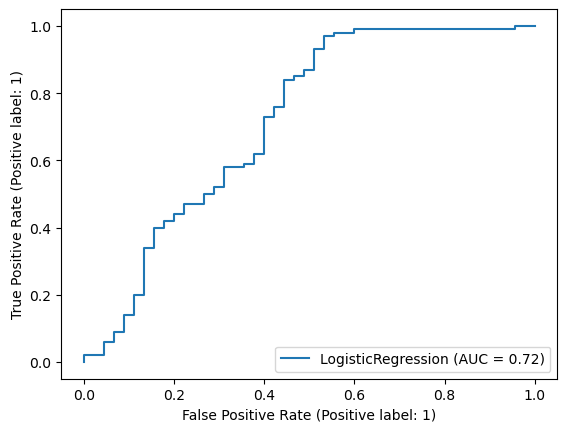

In [98]:
#ROC AUC Curve for the model
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lg, x_test, y_test)

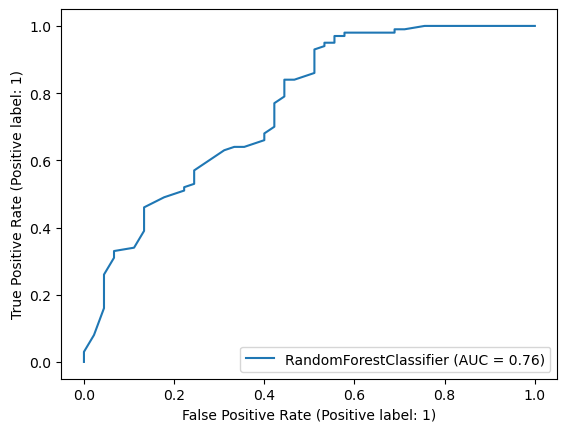

In [99]:
RocCurveDisplay.from_estimator(rfc,x_test,y_test)

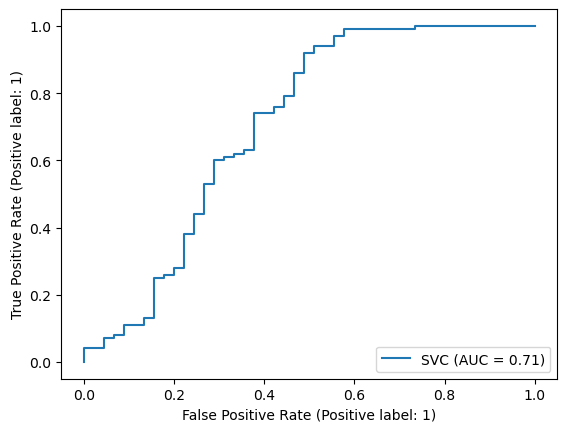

In [100]:
RocCurveDisplay.from_estimator(svc,x_test,y_test)

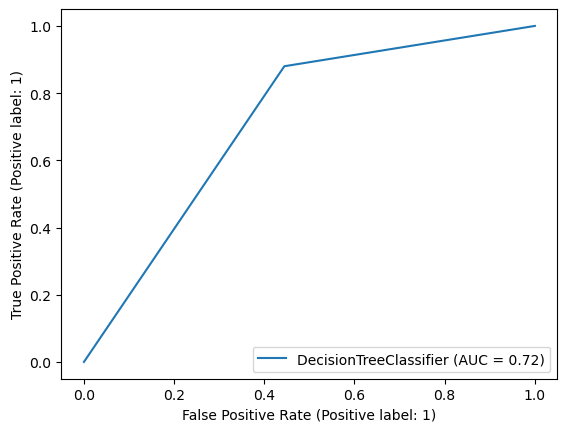

In [101]:
RocCurveDisplay.from_estimator(dtc,x_test,y_test)

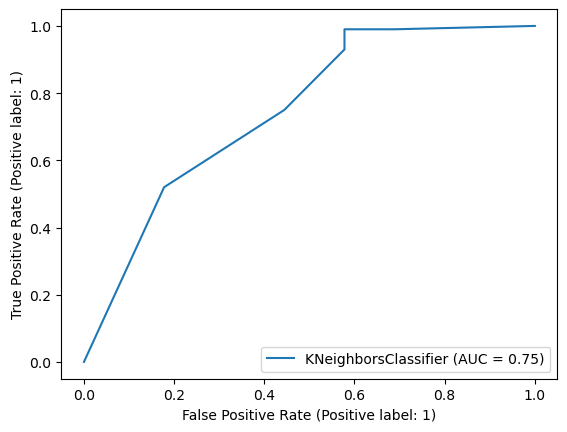

In [102]:
RocCurveDisplay.from_estimator(knn,x_test,y_test)

#### Saving Model

In [103]:
import pickle
filename='LoanApplicationAnalysis.pkl'
pickle.dump(rfc,open(filename,'wb'))

     Actual  Predict
249       1        1
60        1        1
516       1        1
450       0        0
189       1        1
562       1        1
93        1        1
537       1        1
323       1        1
194       1        1
370       1        1
489       0        1
241       0        1
407       1        1
548       0        0
447       0        1
568       0        1
400       0        0
360       0        1
505       1        1
475       1        1
193       1        1
316       1        1
613       0        0
210       0        1
162       0        0
3         1        1
15        1        1
76        0        1
237       1        1
74        1        1
459       0        1
72        1        1
184       1        1
361       1        1
406       1        1
122       1        0
137       1        1
501       1        1
596       0        1
33        1        1
327       1        1
373       0        0
420       1        1
514       0        1
161       0        1
289       1  

Text(0.5, 1.0, 'Random Forest Classifier Line')

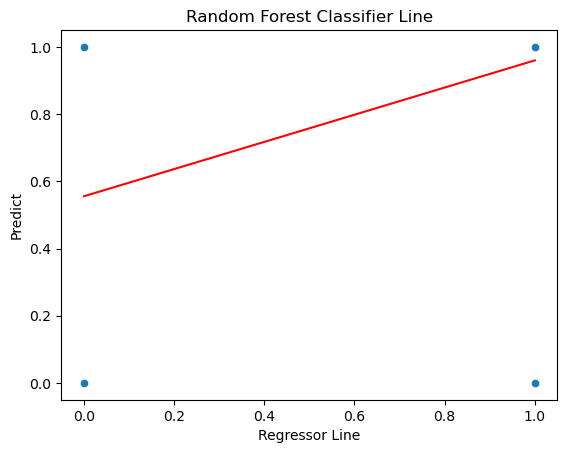

In [105]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
print(res)
x=np.array(y_test)
y=np.array(rfc.predict(x_test))

sns.scatterplot(data=res, x='Actual', y='Predict')


m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b,color='red')
plt.xlabel('Regressor Line')
plt.title('Random Forest Classifier Line')